In [1]:
import numpy as np
from math import log
from collections import Counter
from typing import List
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
dictionary = list(map(str.strip, open('word_list.txt').readlines()))

In [37]:
char_counts = Counter()
for w in dictionary: char_counts.update(w)
counts = sorted(char_counts.items(), key=lambda item: item[1], reverse=True)

In [49]:
char, counts = zip(*counts)

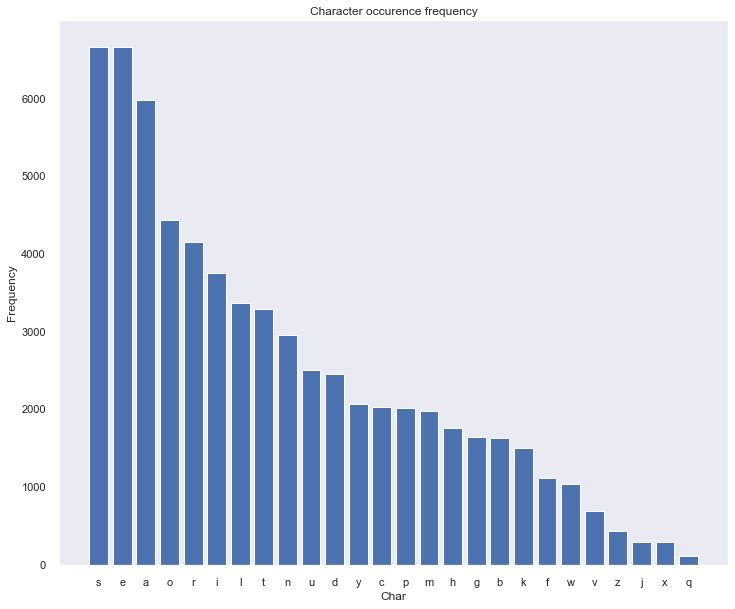

In [63]:
fig, ax = plt.subplots(figsize = (12,10))

plt.bar(char, counts)

ax.set_title('Character occurence frequency')
ax.set_xlabel('Char')
ax.set_ylabel('Frequency')
ax.grid(False)


In [34]:
# stylign
plt.style.use('seaborn')

custom_params = {
    'figure.figsize' : (12, 10),
    "axes.spines.top": False
}

sns.set_theme(style="whitegrid", rc=custom_params)
sns.set_palette("colorblind")
sns.set(rc=custom_params)

In [54]:
df = pd.read_hdf('benchmark_results.h5')
df.reset_index(inplace=True)

In [55]:
df.head()

,index,strategy,word,duration,result,step
0,0,simple,cigar,0.075988,True,6
1,1,simple,rebut,0.062001,True,5
2,2,simple,sissy,0.053000,True,1
3,3,simple,humph,0.076999,True,4
4,4,simple,awake,0.062001,True,4


In [56]:
df.columns

Index(['index', 'strategy', 'word', 'duration', 'result', 'step'], dtype='object')

## Simple strategy performance

Half the time, it takes 4 attempts to guess the word correctly. 9 out of 10 times it can guess the word within the official limit of 6 guesses

In [57]:
simple_results = df[df['strategy'] == 'simple']

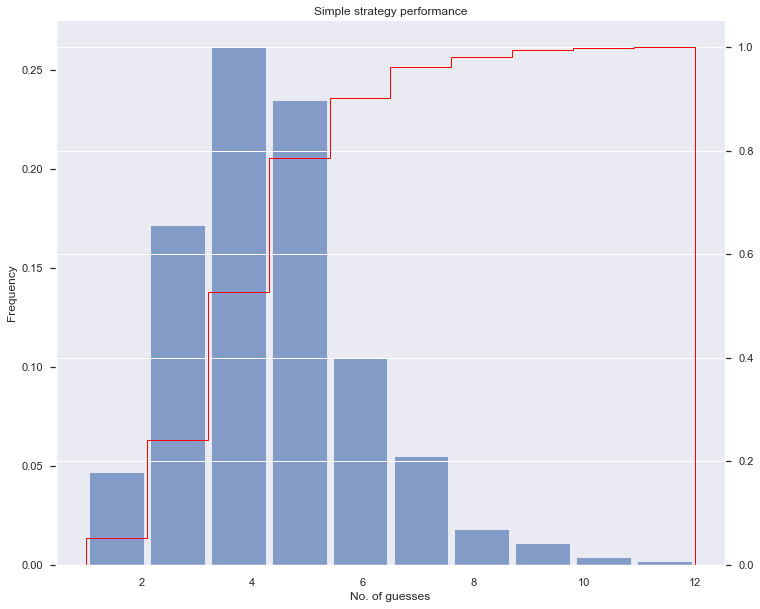

In [58]:
fig, ax = plt.subplots(figsize = (12,10))

simple_results['step'].plot(kind='hist', density = True, alpha = 0.65, rwidth=0.9)

ax2 = ax.twinx()
ax2.hist(
    simple_results['step'], density=True, cumulative=True, histtype="step", color="red"
)
ax.set_title('Simple strategy performance')
ax.set_xlabel('No. of guesses')
ax.set_ylabel('Frequency')
ax.grid(False)


In [13]:
[stats.percentileofscore(simple_results.step, x, 'weak') for x in range(1, 7)]

[0.6047516198704104,
 5.140388768898488,
 24.017278617710584,
 52.786177105831534,
 78.61771058315334,
 90.10799136069114]

## Random explore

In [14]:
random_explore_results = df[df['strategy'] == 'random_explore']

In [15]:
[stats.percentileofscore(random_explore_results.step, x, 'weak') for x in range(1, 7)]

[0.6047516198704104,
 6.263498920086392,
 28.33693304535637,
 60.518358531317496,
 84.06047516198704,
 93.34773218142549]

## Entropy Explore

In [16]:
entropy_explore_results = df[df['strategy'] == 'entropy_explore']

In [17]:
[stats.percentileofscore(entropy_explore_results.step, x, 'weak') for x in range(1, 7)]

[1.8574514038876888,
 23.110151187904968,
 67.30021598272138,
 89.0280777537797,
 96.02591792656587,
 98.48812095032397]

## Comparison of different strategies



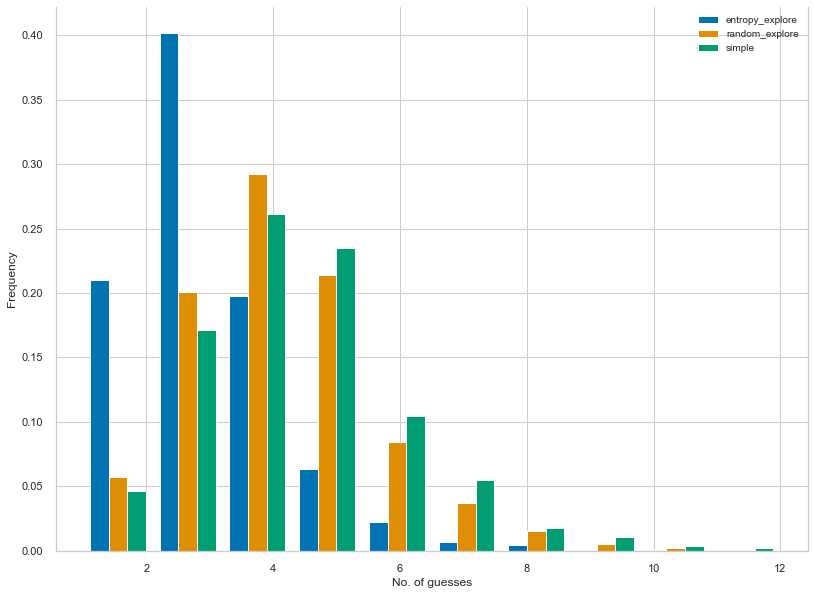

In [117]:
fig, ax = plt.subplots(figsize = (12,10))

all_strategies = df.pivot(columns='strategy', values='step')
plt.hist(all_strategies, rwidth=0.8, density=True, label=all_strategies.columns)
ax.set_xlabel('No. of guesses')
ax.set_ylabel('Frequency')
g = plt.legend(prop={'size': 10})

<AxesSubplot:xlabel='step', ylabel='count'>

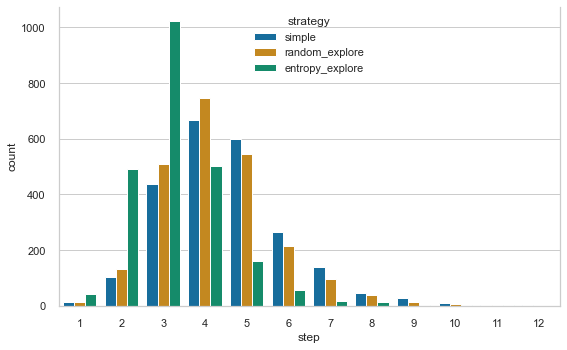

In [119]:
sns.countplot(data=df, x="step", hue='strategy')

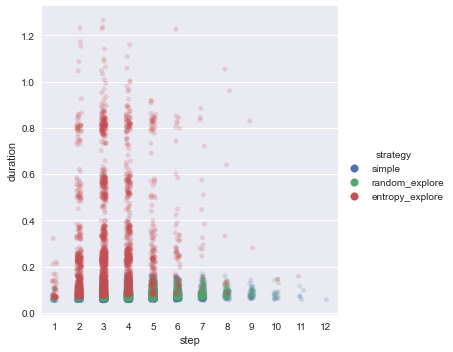

In [51]:
sns.catplot(data=df, x='step', y='duration', hue='strategy', alpha=0.2)

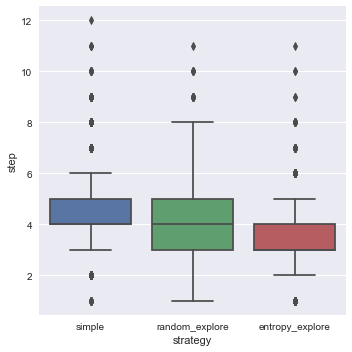

In [52]:
sns.catplot(x="strategy", y="step", kind="box", data=df)

<AxesSubplot:xlabel='strategy', ylabel='step'>

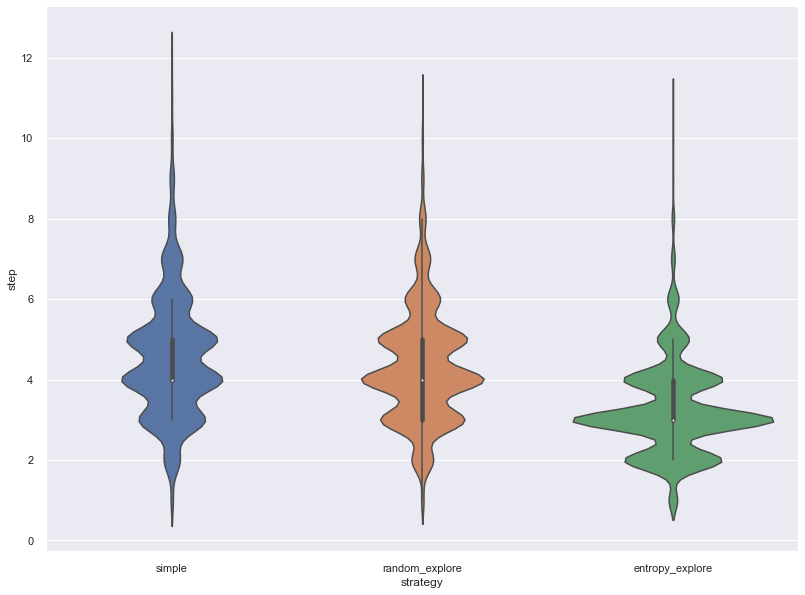

In [127]:
fig, ax = plt.subplots(figsize = (12,10))

sns.violinplot(ax=ax, x="strategy", y="step", kind="violin", data=df)